# 회귀모델은 classification 문제에 약하다. 
어떤발암물질은 임계치 25를 넘으면 암환자료 분류될 확률이 확 증가한다고 가정하자. <br>
이런 분류문제는 직선 식으로는 예측률이 떨어진다.

In [248]:
import pandas as pd
df = pd.DataFrame(columns = ['발암물질', '환자여부'])
df['발암물질'] = [1,3, 6, 9, 11, 15, 20, 14,22, 24, 38, 49, 31, 11, 15, 19, 22, 46, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 42, 44, 46]
df['환자여부'] = [0,0,0,0,0, 0, 0, 0,0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1]
df.head()

,발암물질,환자여부
0,1,0
1,3,0
2,6,0
3,9,0
4,11,0


## 회귀식으로 분류문제를 해결할 경우

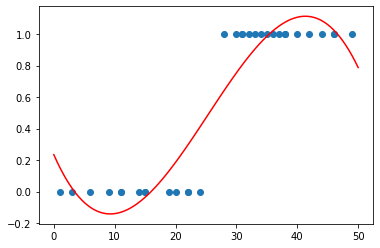

In [249]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def func(x, a, b, c, d):
    return(a*x**3 + b*x**2 + c*x + d )

x = df['발암물질'].values
y = df['환자여부'].values

popt, pcov = curve_fit(func, x, y, p0=[1,1,1,1])  # a, b초기값들
x_data = np.linspace(0, 50, num = 100)
plt.plot(x_data, func(x_data, *popt), 'r-',label='Fitted function')
plt.scatter(x, y)
plt.show()

## logistic regression으로 분류문제를 해결할 경우

<ipython-input-269-6c3423eb29bf>:5: RuntimeWarning: overflow encountered in exp
  return(a/(1 + b*np.exp(-c**(x) + d)))


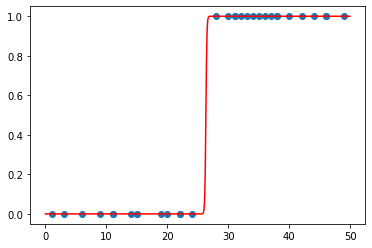

logistic regression의 최적계수 [a, b, c, d]:  [1.00000000e+00 2.12378373e+03 1.17900180e+00 6.84636999e+01]


In [269]:
x = df['발암물질'].values
y = df['환자여부'].values

def func2(x, a, b, c, d):
    return(a/(1 + b*np.exp(-c**(x) + d)))

popt, pcov = curve_fit(func2, x, y, p0=[1,1,1,1])  # a, b, c, d 초기값들
x_data = np.arange(0, 50, 0.1)
plt.plot(x_data, func2(x_data, *popt), 'r-',label='Fitted function')
plt.scatter(x, y)
plt.show()
print('logistic regression의 최적계수 [a, b, c, d]: ', popt) 

<br>그래서 결과값을 0, 1로 분류할 때는 logistic regression을 사용하는게 좋다.<br>
logistic regression의 기본 개념을 정리해보자<br>
이론설명: https://100shye.wixsite.com/website/post/cross-entropy

# 1. w(weights)

- logistic regression의 결과값은 0 or 1 이다. <br>
- w = big + possitive라면 xi는 증가하고, 결과값은 1에 가까워진다. <br>
- w = big + negative라면 xi는 감소하고, 결과값은 0에 가까워진다. <br>
- w가 big일수록 결과값에 미치는 영향이 커진다. 

In [270]:
import numpy as np
N = 100
D = 2
x = np.random.randn(N, D) # 랜덤숫자 2열 100행
x[:50, :] = x[:50, :] - 2*np.ones((50, D))  # 2를 각 값에서 뺌
x[50:, :] = x[50:, :] + 2*np.ones((50, D))  # 2를 각 값에서 더함
#T 는 실제 값 target [0,0,0,0... 1, 1, 1, 1,..]

T = np.array([0]*50 +[1]*50) # 50을 하면 0이 50개 생기네
ones = np.array([[1]*N]).T   # .T를 하면 [[1], [1], [1]..] 됨
Xb = np.concatenate((ones, x), axis = 1) 

w = np.random.randn(D + 1)  #w를 random으로 줬더니 entropy가 작을떄도, 클때도 있음
# w = np.array([0, 4,4])    # w를 특정값으로 고정했더니 entropy 매우 작음
z = Xb.dot(w)
def sigmoid(z):
    return(1/(1 + np.exp(-z)))

Y = sigmoid(z)



<br> 최적화 진행 전

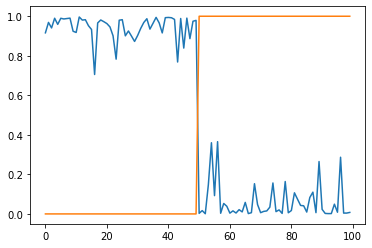

In [271]:
import matplotlib.pyplot as plt

plt.plot(Y)
plt.plot(T)

<br> 최적화 진행 후

365.8868629084353
nan
nan


<ipython-input-272-5c1517ed60f7>:2: RuntimeWarning: divide by zero encountered in log
  E = (-T*np.log(Y) - (1-T)*np.log(1-Y)).sum()
<ipython-input-272-5c1517ed60f7>:2: RuntimeWarning: invalid value encountered in multiply
  E = (-T*np.log(Y) - (1-T)*np.log(1-Y)).sum()


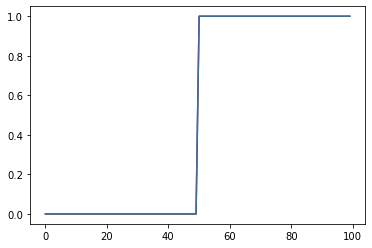

In [272]:
 
def cross_entropy(T, Y):
    E = (-T*np.log(Y) - (1-T)*np.log(1-Y)).sum() 
    return(E)
cross_entropy(T,Y )

learning_rate = 0.1
for i in range(30):
    if i%10 == 0:  # i = 0, 10, 20,.... 90 일때만 최적화 어케되가나 점검
        print(cross_entropy(T, Y))
    w += learning_rate * np.dot((T-Y).T, Xb)
    Y = sigmoid(Xb.dot(w))
w

plt.plot(Y, color = 'red')
plt.plot(T)

# 2. Regularization(정규화)
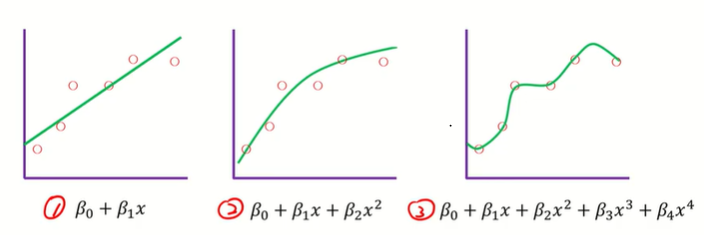
<br>
1, 2, 3 세개의 식 중에서 데이터를 제일 잘 설명하는 식은 어느것일까? <br>
1번식은 variance이 매우 크다. 3번식은 training data는 잘 맞추지만 test set은 예측력이 떨어진다. <br>
예측모델이 3번째처럼 되지 않고 2번 모델이 되도록 과적합(overfitting)을 방지해야 한다.<br>

과적합을 막기위한 수단은 세가지가 있다.<br>
- batch normalization. (배치정규화) <br>
- weight regularization (정규화) <br>
- dropout (학습당시 랜덤으로 절반의 뉴런만 사용하기) <br><br>

그중에서 weight regularization방법에는 L1, L2 두가지 방법이 있다 <br> 
학습을 진행하면서 특정 weight 값만 커지면 과적합이 되기 때문에 weight를 조절하는 것<br>
위의 그림에서 beta값에 제약을 줘서 특정 값 이상이 되지 않도록 조절하면서 과적합을 피하는 방법이다. <br>

- L1 regularization(Lasso regression)

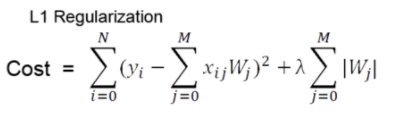 

<br><br>
- L2 regularization(Ridge regression)
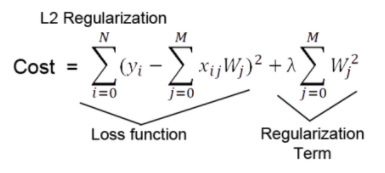

<br>
그림참고 <br>
 - https://www.youtube.com/watch?v=pJCcGK5omhE <br>
 - https://huidea.tistory.com/154 

nan
1.5227439363197253
1.564935140504173
1.564994651828595
1.5649956553705593


<ipython-input-273-00eb4fb92a41>:6: RuntimeWarning: divide by zero encountered in log
  E = (-T*np.log(Y) - (1-T)*np.log(1-Y)).sum()
<ipython-input-273-00eb4fb92a41>:6: RuntimeWarning: invalid value encountered in multiply
  E = (-T*np.log(Y) - (1-T)*np.log(1-Y)).sum()


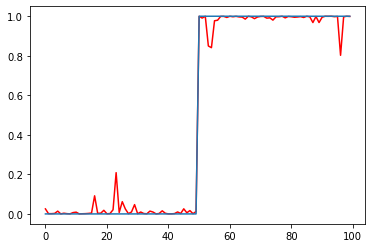

In [273]:
# 과적합을 막기 위해 regularization을 추가한다

w = np.random.randn(D + 1)  #w를 random으로 줬더니 entropy가 작을떄도, 클때도 있음

def cross_entropy(T, Y):
    E = (-T*np.log(Y) - (1-T)*np.log(1-Y)).sum() 
    return(E)
cross_entropy(T,Y )

learning_rate = 0.1
for i in range(100):
    if i%20 == 0:  # i = 0,  20,.... 80 일때만 최적화 어케되가나 점검
        print(cross_entropy(T, Y))
    w += learning_rate * np.dot((T-Y).T, Xb) \
    - 0.1*w  # regularization 부분
    Y = sigmoid(Xb.dot(w))

plt.plot(Y, color = 'red')
plt.plot(T)